In [1]:
# 1. DL_Classification_abalone

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [7]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Rings'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Rings'])

In [8]:
# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,14,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,6,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,8,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,9,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,6,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,10,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,9,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,8,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [9]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Shell_weight')

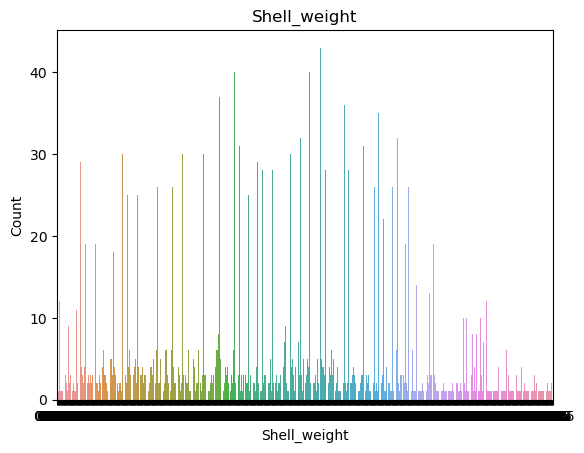

In [10]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Shell_weight")
plt.xlabel("Shell_weight")
plt.ylabel("Count")
plt.title("Shell_weight")

In [11]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [12]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [13]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_51759/3101609980.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_51759/3101609980.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Diameter', ylabel='Density'>

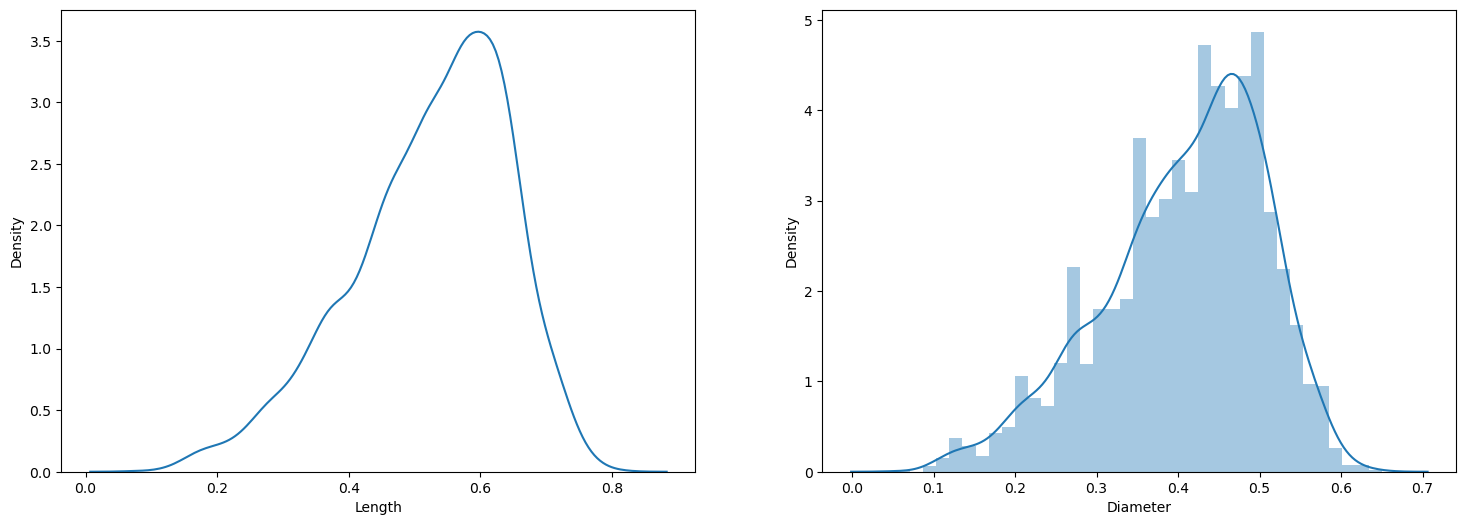

In [14]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

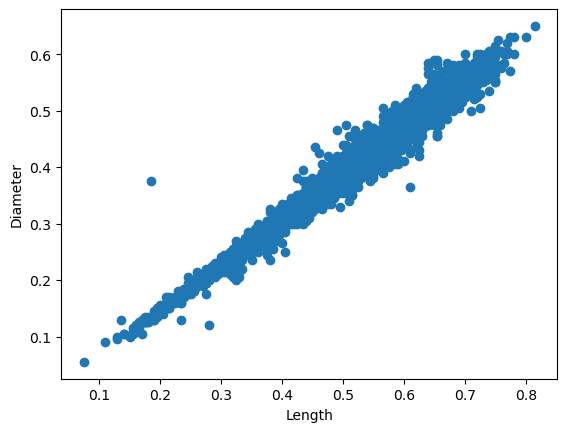

In [15]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

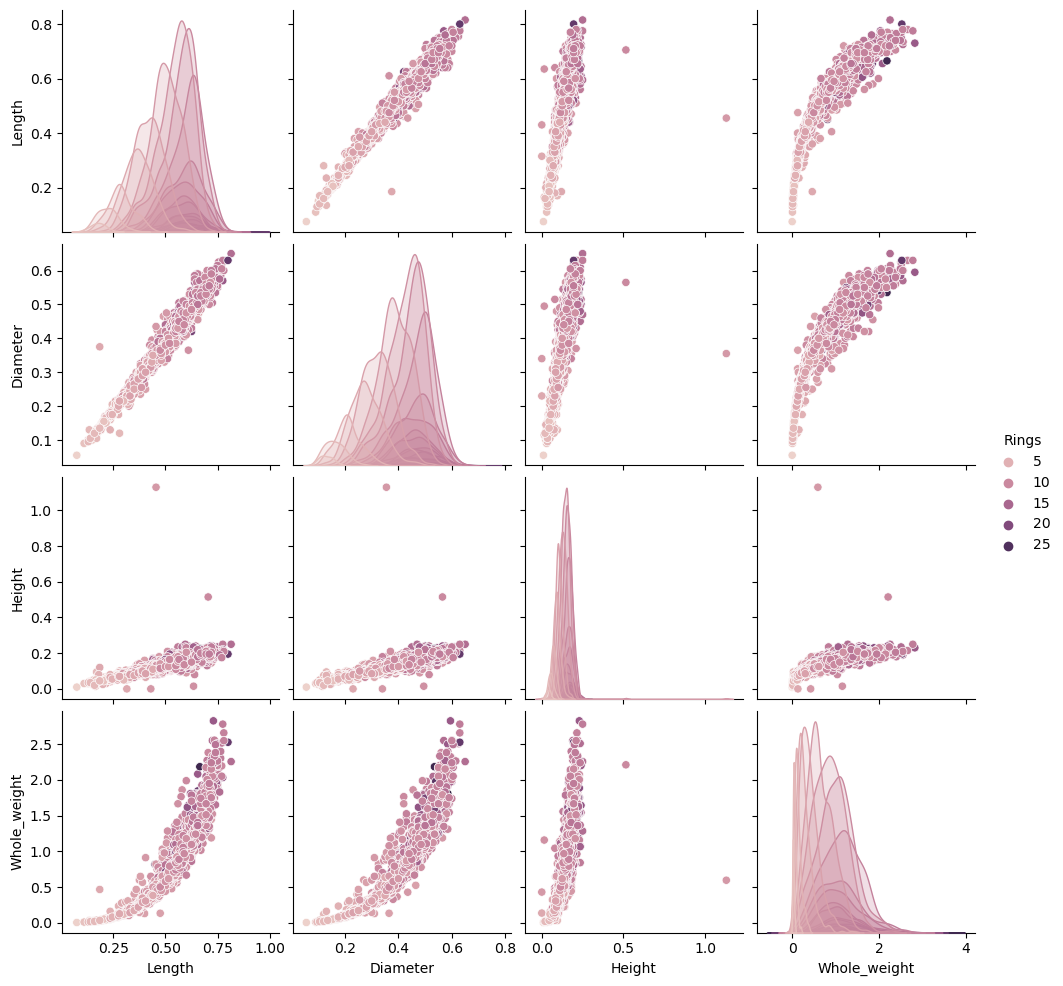

In [16]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Length', 'Diameter', 'Height', 'Whole_weight'],
            hue ='Rings')
plt.show()

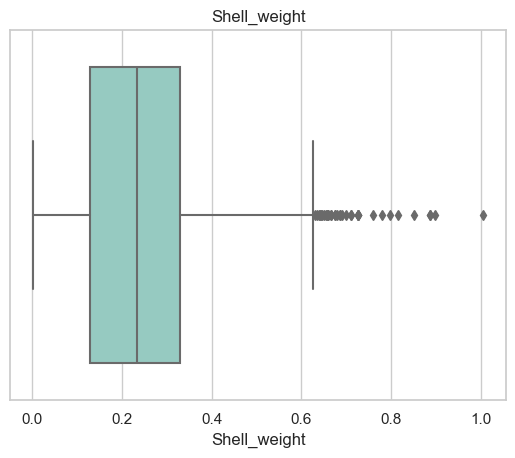

In [17]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Shell_weight", data=df, palette="Set3")
plt.title("Shell_weight")
plt.show()

/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_51759/2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


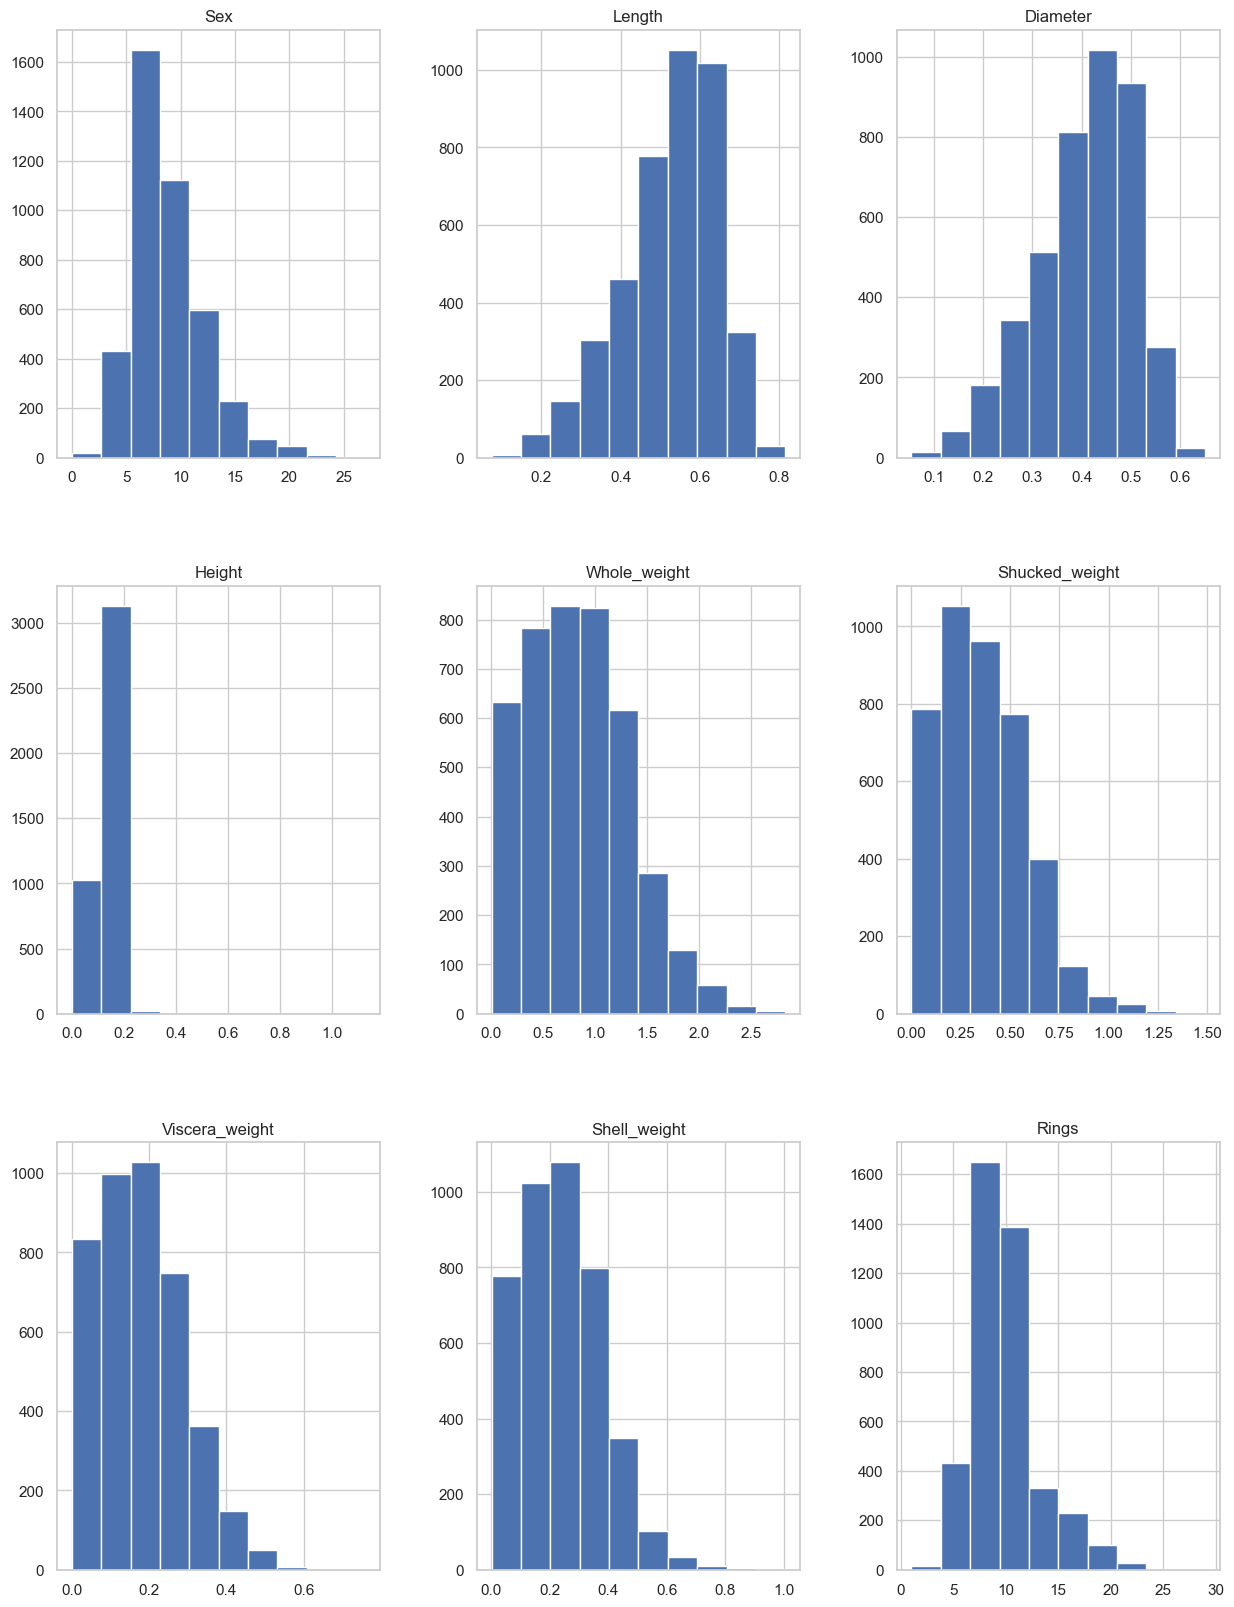

In [18]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [19]:
X=df.drop('Shell_weight',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Rings
id,,,,,,,,
0,14,0.455,0.365,0.095,0.5140,0.2245,0.1010,15
1,6,0.350,0.265,0.090,0.2255,0.0995,0.0485,7
2,8,0.530,0.420,0.135,0.6770,0.2565,0.1415,9
3,9,0.440,0.365,0.125,0.5160,0.2155,0.1140,10
4,6,0.330,0.255,0.080,0.2050,0.0895,0.0395,7


In [20]:
y=df['Shell_weight']
y.value_counts()

0.2750    43
0.2500    42
0.2650    40
0.3150    40
0.1850    40
          ..
0.0060     1
0.6460     1
0.5010     1
0.3295     1
0.0920     1
Name: Shell_weight, Length: 926, dtype: int64

In [21]:
y.head()

id
0    0.150
1    0.070
2    0.210
3    0.155
4    0.055
Name: Shell_weight, dtype: float64

In [22]:
Y = pd.get_dummies(y).values

In [23]:
X = X.values

In [24]:
X

array([[14.    ,  0.455 ,  0.365 , ...,  0.2245,  0.101 , 15.    ],
       [ 6.    ,  0.35  ,  0.265 , ...,  0.0995,  0.0485,  7.    ],
       [ 8.    ,  0.53  ,  0.42  , ...,  0.2565,  0.1415,  9.    ],
       ...,
       [ 8.    ,  0.6   ,  0.475 , ...,  0.5255,  0.2875,  9.    ],
       [ 9.    ,  0.625 ,  0.485 , ...,  0.531 ,  0.261 , 10.    ],
       [11.    ,  0.71  ,  0.555 , ...,  0.9455,  0.3765, 12.    ]])

In [25]:
y

id
0       0.1500
1       0.0700
2       0.2100
3       0.1550
4       0.0550
         ...  
4172    0.2490
4173    0.2605
4174    0.3080
4175    0.2960
4176    0.4950
Name: Shell_weight, Length: 4177, dtype: float64

In [26]:
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [28]:
X_train.shape[1]

8

In [29]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import tensorflow as tf

model = Sequential()

model.add(Dense(34,input_shape=(X_train.shape[1],),activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(28,activation='sigmoid'))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 34)             │           306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │           868 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,284 (12.83 KB)

 Trainable params: 3,284 (12.83 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 예시 데이터 생성
num_samples = 1000  # 샘플 수
num_features = 20   # 특성 수
num_classes = 926   # 클래스 수

# 임의의 데이터 생성
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, num_classes, size=(num_samples,))

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# y_train을 원-핫 인코딩 (정수 인코딩일 경우)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# 모델 정의
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(num_features,)))  # input_shape 설정
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # 클래스 수에 맞추기

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 예측
y_pred = model.predict(X_test)

# 클래스 예측
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 예측 결과 출력
print("y_test_class:", y_test_class)
print("y_pred_class:", y_pred_class)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 6.8338 - val_accuracy: 0.0000e+00 - val_loss: 6.8425
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0034 - loss: 6.7106 - val_accuracy: 0.0000e+00 - val_loss: 7.0998
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0068 - loss: 6.2962 - val_accuracy: 0.0000e+00 - val_loss: 7.8812
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0089 - loss: 6.1364 - val_accuracy: 0.0000e+00 - val_loss: 8.1164
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0067 - loss: 6.0532 - val_accuracy: 0.0000e+00 - val_loss: 8.3849
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0141 - loss: 5.9692 - val_accuracy: 0.0000e+00 - val_loss: 8.5805
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0055 - loss: 5.8770 - val_accuracy: 0.0000e+00 - val_loss: 8.8102
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0148 - loss: 5.7471 - 

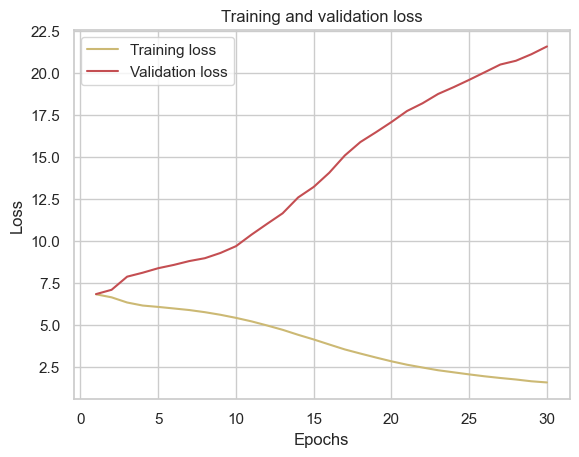

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

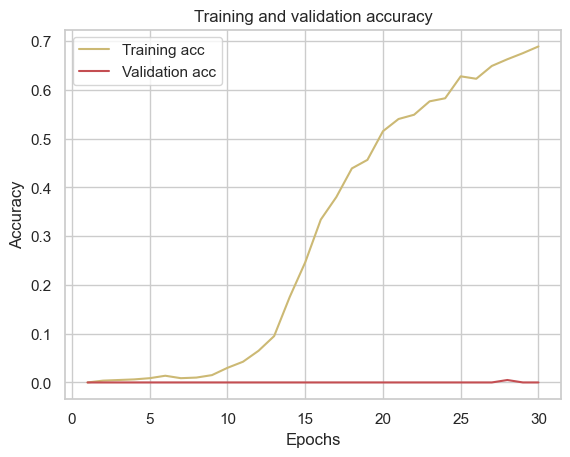

In [34]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       2.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       0.0
          55       0.00      0.00      0.00       2.0
          58       0.00    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

In [36]:
# 2. DL_regression_abalone

In [38]:
df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [39]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [40]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


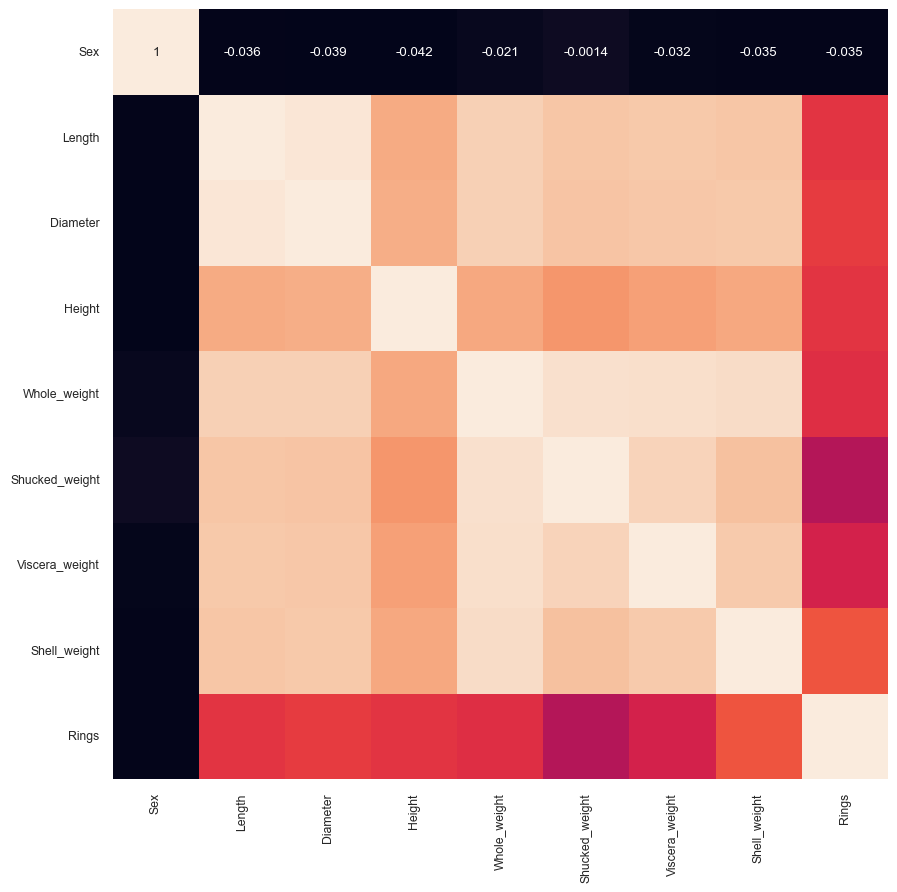

In [41]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
X = df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [44]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [45]:
Y = pd.get_dummies(y).values

In [46]:
X = X.values

In [47]:
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [48]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 8), (3341, 28), (836, 8), (836, 28))

In [51]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s

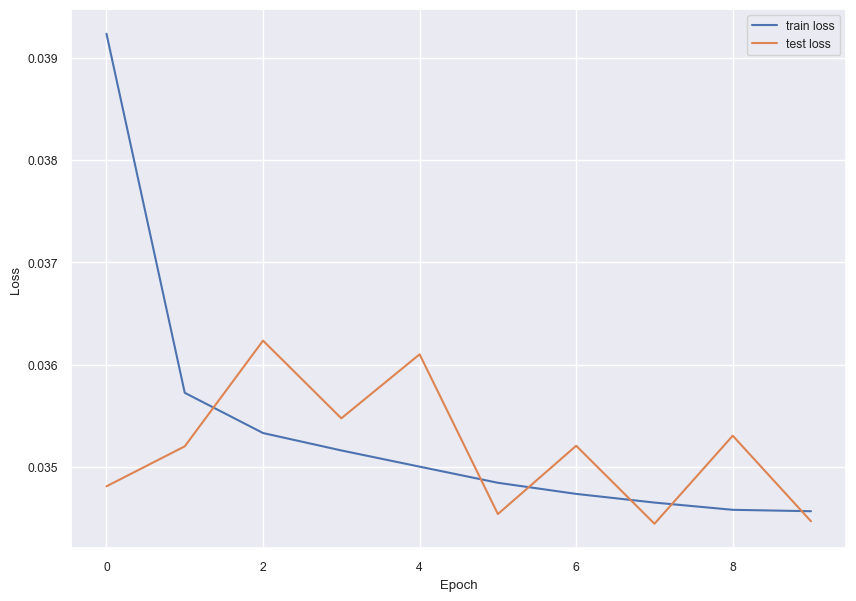

In [53]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0345 - mse: 0.0345


[0.03446847200393677, 0.03446847200393677]